# 05. Logistic regression

#### 1. Download data from https://science.sciencemag.org/content/359/6378/926 (supplementary materials). If you do not succeed, you will find _aar3247_Cohen_SM_Tables-S1-S11.xlsx_ file in the homework's folder.
 - read the actract of the article to get familiar with data origin
 - open the data in excel and get familiar with its content
 - load the protein level data (you need to figure out which one is that) as a pandas dataframe
 - handle missing values and convert features to numeric values when it is needed
 - get rid of the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results

#### 2. Predict if a sample is cancerous or not
 - your need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
 - train a logistic regression (sklearn API) on every second sample (not first 50% of the data (!), use every second line)
 - generate prediction for the samples that were not used during the training

#### 3. Comparision to CancerSEEK
 - plot the ROC curve and calculate the confusion matrix for the predictions
 - do the same for the CancerSEEK predictions
 - compare your model's performance to CancerSEEK performance

#### 4. Hepatocellular carcinoma
 - fit a logistic regression (using statsmodels API this time) to predict if a sample has Hepatocellular carcinoma (liver cancer) or not. You need to keep only the liver and the normal samples for this exercise! For fitting use only the first 25 features and all the rows (which are liver or normal)
 - select the 5 best predictor based on P values.
 - Write down the most important features (based on P value) and compare them to the tumor markers that you find on wikipeida https://en.wikipedia.org/wiki/Hepatocellular_carcinoma or other sources!

#### 5. Multiclass classification
 - Again, using every second datapoint train a logistic regression (sklearn API) to predict the tumor type. It is a multiclass classification problem.
 - Generate prediction for the rest of the dataset and show the confusion matrix for the predictions!
 - Plot the ROC curves for the different cancer types on the same plot! 
 - Intepret your results. Which cancer type can be predicted the most reliably?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve , plot_confusion_matrix,plot_roc_curve
from statsmodels.discrete.discrete_model import Logit, LogitResults
import statsmodels.tools as sm


In [2]:
import matplotlib.image as mpimg

In [3]:
"""
Preparation for downloading the data from the internet
"""
url = "https://science.sciencemag.org/highwire/filestream/704651/field_highwire_adjunct_files/1/aar3247_Cohen_SM_Tables-S1-S11.xlsx"
xls = pd.ExcelFile(url)

In [4]:
"""
Altough this program downloads the xls file from the website, I downloaded it manuallay and I decided, that the table we need is the Table S6
Wich is index 5, the first two row is not used, contains Nan as the last 4 so I skipped them
"""
solution_dataframe = pd.read_excel(xls,xls.sheet_names[5],header = 2,skipfooter=4)
solution_dataframe.drop(labels= ['Patient ID #','Sample ID #', 'AJCC Stage','CancerSEEK Test Result'],axis=1,inplace=True)

In [5]:
"""
Erase every *, then convert the values into float using a lambda function and the map method
"""
for c in solution_dataframe.columns[1:len(solution_dataframe.columns)-1]:
    solution_dataframe[c] = solution_dataframe[c].map(lambda x: float(str(x).replace('*','')))
solution_dataframe.fillna(solution_dataframe.mean(),inplace = True)

# Task 2

In [6]:
def create_dataset(df,tumortype):
    """
    This function slice into 4 pieces the dataset and returns with them
    It's first argument is a dataframe
    Second is wich tumor type we want to find
    """
    x_train = df[df.columns[1:len(df.columns)-1]][::2]
    x_test = df[df.columns[1:len(df.columns)-1]][1::2]
    y_train = (df['Tumor type'][::2] == tumortype)*1
    y_test = (df['Tumor type'][1::2] == tumortype)*1
    return x_train,x_test,y_train,y_test

In [7]:
# Creating the dataset's for the logistic regression
x_train,x_test,y_train,y_test = create_dataset(solution_dataframe,'Normal')

In [8]:
"""
Creating a logistic regression object, than using its fit method on x and y train dataset
"""
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Task 3

In [9]:
# Predictions of logistic regression
predictions = logreg.predict(x_test)

In [10]:
def task3(x,y,lg = logreg):
    """
    This function will create 2 images
    One for ROC Curve and a Confusion Matrix
    x and y parameters are the values we want to pass to the roc curve and the confusion matric
    lg is basicly the model we used
    """

    plt.figure(figsize=(12,6))
    ax1 = plt.subplot(121)
    plot_roc_curve(lg,x,y,ax = ax1)
    plt.title('ROC Curve')
    plt.plot(np.linspace(0,1),np.linspace(0,1))
   
    ax2 = plt.subplot(122)
    plot_confusion_matrix(logreg,x,y,ax = ax2)
    plt.title("Confusion Matrix")

In [11]:
#task3(x_test,y_test)

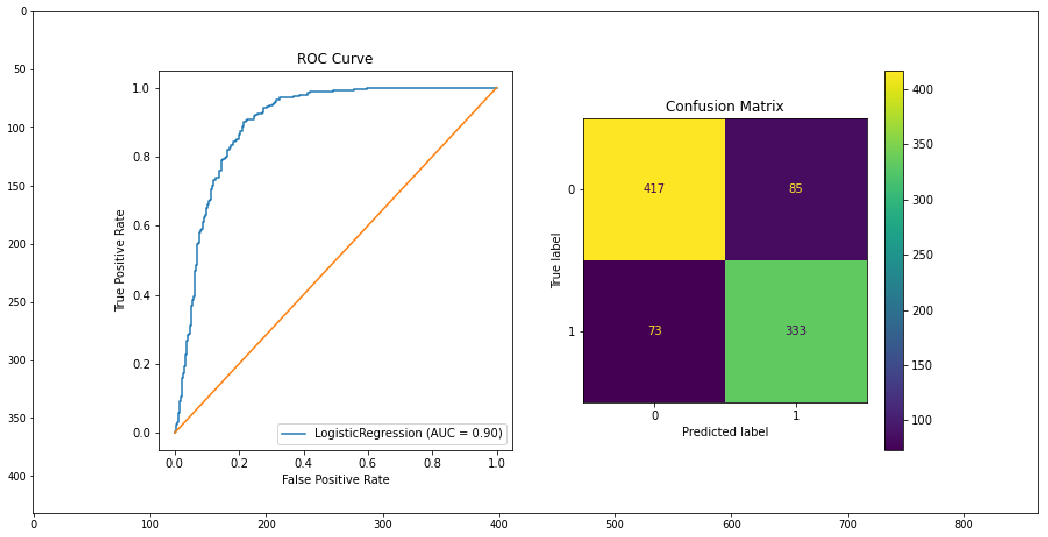

In [12]:
"""
I have no idea why the kooplex can't import plot_confusion_matrix and plot_roc_curve from sklearn.metrics
But I usually work with Visual Studio Code, so I saved plots and uploaded them
Some of my friends said it's working for them
"""

img1 = mpimg.imread('First.png')
plt.figure(figsize=(18,18))
plt.imshow(img1)

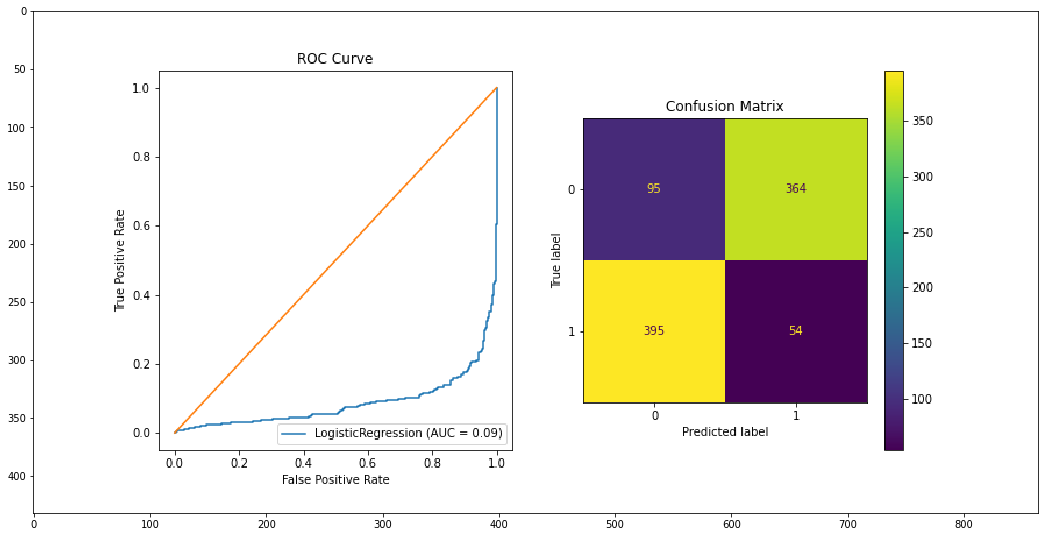

In [13]:
img1 = mpimg.imread('second.png')
plt.figure(figsize=(18,18))
plt.imshow(img1)

# The solution was originally:  
task3(x_test,y_test)  
new cell  
csp = solution_dataframe[solution_dataframe.columns[len(solution_dataframe.columns)-1]].map(lambda x:np.round(x))  
task3(x_test,csp[1::2])  

# Task 4

In [14]:
"""
Creating the dataset for the fourth task
"""
dataset = solution_dataframe[ (solution_dataframe['Tumor type'] == 'Normal') | (solution_dataframe['Tumor type'] == 'Liver') ][solution_dataframe.columns[0:25]]

In [15]:
"""
Prepareing the dataset for the Logit function
"""
Tumors = (dataset['Tumor type'] == 'Normal')*1
dataset.drop(['Tumor type'],axis = 1,inplace = True)
dataset = sm.add_constant(dataset)

In [16]:
"""
Creating the modell with Logit function
"""

model = Logit(Tumors,dataset)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [18]:
"""
Writing out the five lowest p values, these are the best predictors
"""

model.fit().pvalues.sort_values()[0:5]

Optimization terminated successfully.
         Current function value: 0.031360
         Iterations 12


HGF (pg/ml)      0.000936
CD44 (ng/ml)     0.010047
DKK1 (ng/ml)     0.011931
HE4 (pg/ml)      0.019870
CA-125 (U/ml)    0.053772
dtype: float64

# Task 5

In [19]:
"""
Creating the dataset's for the last task
"""

y_train5 = solution_dataframe[::2]['Tumor type']
x_train5 = solution_dataframe[::2].drop("Tumor type",axis = 1)

y_test5 = solution_dataframe[1::2]['Tumor type']
x_test5 = solution_dataframe[1::2].drop("Tumor type",axis = 1)

In [20]:
"""
With this dictionary I'm going to replace the strings with numerical values to be able to fit them with the model
"""
mydict = {}
tumor_types = y_train5.unique()
for i,ctype in enumerate(tumor_types):
    mydict[ctype]= i
y_train5.replace(mydict,inplace=True)
y_test5.replace(mydict,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
"""
Creating a logistic regression object than using it and predicting with it
also creating the confusion matrix
"""
log5 = LogisticRegression()
log5.fit(x_train5,y_train5)
predictions = log5.predict(x_test5)
cm = confusion_matrix(predictions,y_test5)

Text(0.5, 1.0, 'Confusion matrix')

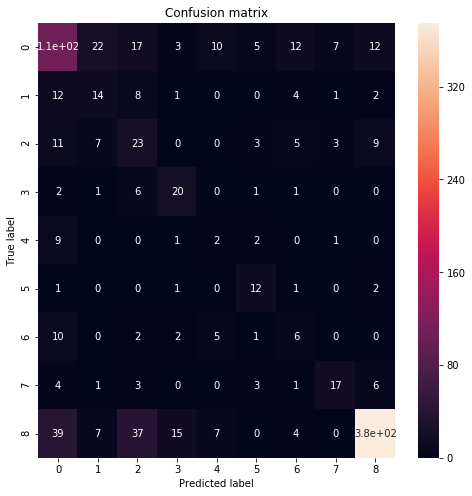

In [28]:
"""
From the confusion matrix it is easy to create an image with seaborn heatmap
It is the easiest way
"""

plt.figure(figsize=(8,8))
img = sns.heatmap(cm,annot=True)
img.set_xlabel('Predicted label')
img.set_ylabel('True label')
img.set_title('Confusion matrix')

In [29]:
"""
Preapareing the data for the roc curves
"""
score = log5.fit(x_test5,y_test5).decision_function(x_test5)
y_hot = pd.get_dummies(y_test5).to_numpy()

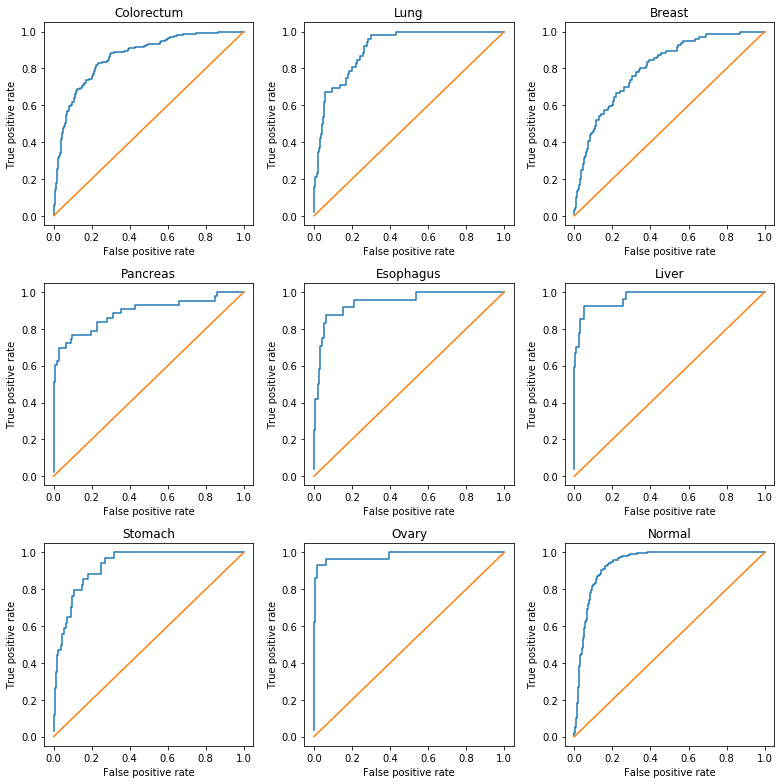

In [31]:
"""
Calculateing and plotting the roc curves
I used one subplot for it is easier to see nex to each other
"""
plt.figure(figsize=(11,11))
for i,tumortype in enumerate(tumor_types):
    plt.subplot(3,3,i+1)
    plt.title(tumortype)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    fpr,tpr ,_ = roc_curve(y_hot[:,i],score[:,i])
    plt.plot(fpr,tpr)
    plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.tight_layout()

By watching it I'd say thet the ovary and the liver cancer can be predicted the most reliably